In [1]:
import pandas as pd
df = pd.read_stata('Demographic_Background.dta')

In [2]:
# ba004_w3_1 is the birth year on ID card or Household register, which will be used for age calculation
# check missing values in ba004_w3_1
missing_birth_years = df['ba004_w3_1'].isnull().sum()
print(missing_birth_years)

322


In [3]:
# drop missing values
df = df.dropna(subset=['ba004_w3_1'])

In [4]:
# calculate age
survey_year = 2018
df['age'] = survey_year - df['ba004_w3_1']

#filter age >=50 people
filtered_age_df = df[df['age'] >= 50]

Education: 
• BD001_W2_4: “What’s the highest level of education you have now (not including adult education)?

Marriage: 
• BE001: "What is your marital status?" 

religious belief:
• BG002_W4 Do you have any religious belief?

In [5]:
# select columns related education、marriage、religious belief
new_df = filtered_age_df[['ID', 'age', 'bd001_w2_4', 'be001', 'bg002_w4']].reset_index(drop=True)
new_df

,ID,age,bd001_w2_4,be001,bg002_w4
0,094004113002,64.0,5 Middle School,5 Widowed,2 No
1,094004111002,64.0,4 Elementary School,1 Married with Spouse Present,2 No
2,094004111001,64.0,4 Elementary School,1 Married with Spouse Present,2 No
3,094004112001,72.0,5 Middle School,5 Widowed,2 No
4,094004118001,66.0,5 Middle School,1 Married with Spouse Present,2 No
...,...,...,...,...,...
17340,294099304001,59.0,6 High School,1 Married with Spouse Present,2 No
17341,294099303002,54.0,5 Middle School,1 Married with Spouse Present,2 No
17342,294099303001,55.0,5 Middle School,1 Married with Spouse Present,2 No
17343,294099311001,64.0,5 Middle School,1 Married with Spouse Present,2 No


In [6]:
# check missing values in bd001_w2_4
missing_education = new_df['bd001_w2_4'].isnull().sum()
print(missing_education)

0


In [7]:
# Define a dictionary to map the original education levels to the new categories，
# dividing the education levels into "low, medium, high" three categories
education_mapping = {
    "1 No Formal Education (Illiterate)": "low",
    "2 Did not Finish Primary School": "low",
    "3 Sishu/Home School": "low",
    "4 Elementary School": "low",
    "5 Middle School": "low",
    "6 High School": "medium",
    "7 Vocational School": "medium",
    "8 Two-/Three-Year College/Associate Degree": "high",
    "9 Four-Year College/Bachelor’s Degree": "high",
    "10 Master’s Degree": "high",
    "11 Doctoral Degree/Ph.D.": "high"
}

# Reclassify educational levels using a mapping dictionary
new_df['bd001_w2_4'] = new_df['bd001_w2_4'].map(education_mapping)

# Rename column
new_df.rename(columns={'bd001_w2_4': 'Level of education'}, inplace=True)
# check the change
new_df.tail()

,ID,age,Level of education,be001,bg002_w4
17340,294099304001,59.0,medium,1 Married with Spouse Present,2 No
17341,294099303002,54.0,low,1 Married with Spouse Present,2 No
17342,294099303001,55.0,low,1 Married with Spouse Present,2 No
17343,294099311001,64.0,low,1 Married with Spouse Present,2 No
17344,294099311002,63.0,low,1 Married with Spouse Present,2 No


In [8]:
# change the data type in 'Level of education'
new_df['Level of education'] = new_df['Level of education'].astype('category')

In [9]:
# check data type in 'Level of education'
print(new_df['Level of education'].dtype)

category


In [10]:
# check missing values in be001
missing_marriage = new_df['be001'].isnull().sum()
print(missing_education)

0


In [11]:
# Recategorize marital status
# Married: Indicates a formal marital relationship. 
# Unmarried: Widely used to describe all states of not being in a marital relationship, including never, separated, divorced, and widowed.
new_df['be001'] = new_df['be001'].map({
    "1 Married with Spouse Present": "married",
    "2 Married But Not Living with Spouse Temporarily for Reasons Such as Work": "married",
    "3 Separated": "unmarried",
    "4 Divorced": "unmarried",
    "5 Widowed": "unmarried",
    "6 Never Married": "unmarried"
}).astype('category')

# Rename the column name to 'marital status'
new_df.rename(columns={'be001': 'marital status'}, inplace=True)

# check results
new_df


,ID,age,Level of education,marital status,bg002_w4
0,094004113002,64.0,low,unmarried,2 No
1,094004111002,64.0,low,married,2 No
2,094004111001,64.0,low,married,2 No
3,094004112001,72.0,low,unmarried,2 No
4,094004118001,66.0,low,married,2 No
...,...,...,...,...,...
17340,294099304001,59.0,medium,married,2 No
17341,294099303002,54.0,low,married,2 No
17342,294099303001,55.0,low,married,2 No
17343,294099311001,64.0,low,married,2 No


In [12]:
# check missing values in bg002_w4
missing_religion = new_df['bg002_w4'].isnull().sum()
print(missing_religion)

0


In [13]:
# Rename the column name to 'religious belief'
new_df.rename(columns={'bg002_w4': 'religious belief'}, inplace=True)
new_df

,ID,age,Level of education,marital status,religious belief
0,094004113002,64.0,low,unmarried,2 No
1,094004111002,64.0,low,married,2 No
2,094004111001,64.0,low,married,2 No
3,094004112001,72.0,low,unmarried,2 No
4,094004118001,66.0,low,married,2 No
...,...,...,...,...,...
17340,294099304001,59.0,medium,married,2 No
17341,294099303002,54.0,low,married,2 No
17342,294099303001,55.0,low,married,2 No
17343,294099311001,64.0,low,married,2 No


In [14]:
# Recategorize religious belief
new_df['religious belief'] = new_df['religious belief'].map({
    "1 Yes": "Yes",
    "2 No": "No"
}).astype('category')

new_df.tail(1)

,ID,age,Level of education,marital status,religious belief
17344,294099311002,63.0,low,married,No


In [15]:
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\86156\AppData\Local\Temp\ipykernel_26240\85757574.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='marital status', palette='pastel', ax=axes[0, 1])
C:\Users\86156\AppData\Local\Temp\ipykernel_26240\85757574.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Level of education', palette='Set2', ax=axes[1, 0])


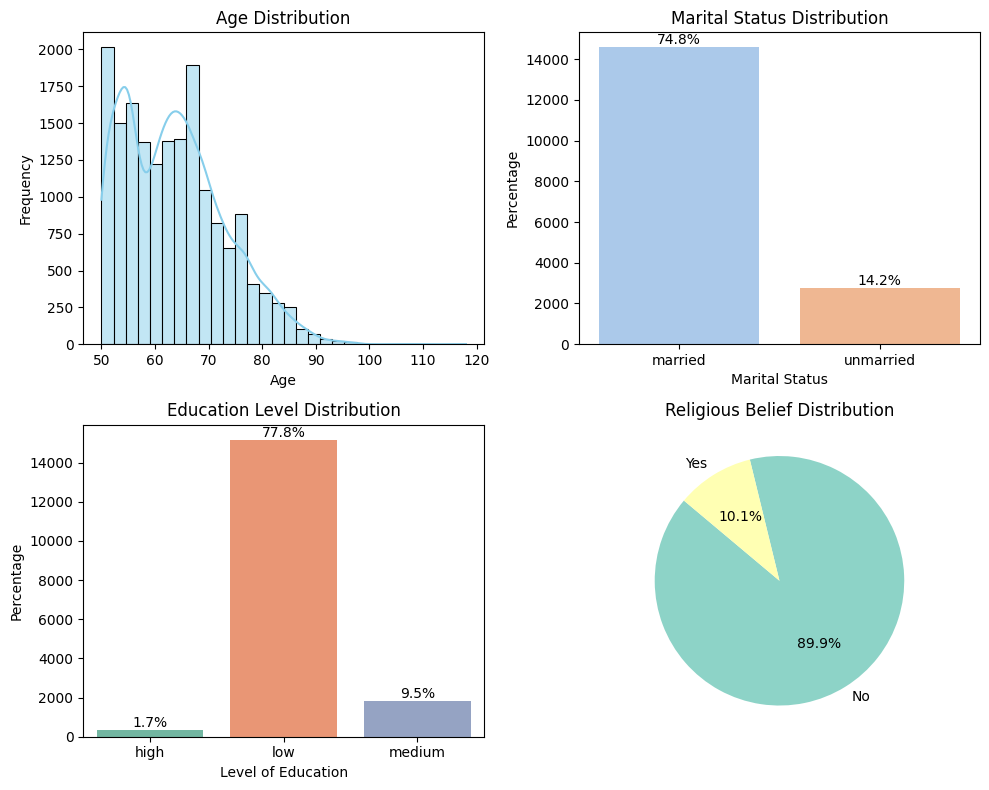

In [18]:

# Set the canvas size
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Figure 1: Age Distribution Histogram
sns.histplot(data=new_df, x='age', bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Figure 2: Distribution of marital status
marital_counts = new_df['marital status'].value_counts(normalize=True) * 100  # Calculate the percentage
sns.countplot(data=new_df, x='marital status', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution')
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Percentage')

# Add percentage labels to the bar chart
for p in axes[0, 1].patches:
    percentage = f"{p.get_height() / len(df) * 100:.1f}%"  #  Calculate the percentage of each bar
    axes[0, 1].annotate(percentage,                   
                        (p.get_x() + p.get_width() / 2, p.get_height()),  
                        ha='center', va='bottom')     

# Figure 3: Distribution of Educational Levels
education_counts = new_df['Level of education'].value_counts(normalize=True) * 100  # Calculate the percentage
sns.countplot(data=new_df, x='Level of education', palette='Set2', ax=axes[1, 0]) 
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].set_xlabel('Level of Education')
axes[1, 0].set_ylabel('Percentage')

#  Adding Percentage Labels to Bar Charts
for p in axes[1, 0].patches:
    percentage = f"{p.get_height() / len(df) * 100:.1f}%"  # Calculate the percentage of each bar
    axes[1, 0].annotate(percentage, 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom')

# # Figure 4: Pie chart of religious beliefs
religious_counts = new_df['religious belief'].value_counts()
axes[1, 1].pie(religious_counts, labels=religious_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
axes[1, 1].set_title('Religious Belief Distribution')

# Adjust the layout
plt.tight_layout()

plt.show()
